In [28]:
%matplotlib inline
%autoreload 2 

In [7]:
from __future__ import (division, absolute_import,
                        print_function, unicode_literals)

In [8]:
import george
from george.kernels import KappaKappaExpSquaredKernel

In [17]:
import sys
sys.path.append("../")
import sample_and_fit_gp as fit
import diag_plots as plot

In [14]:
truth = (0.5, 1.)  # 0.5 = inv_lambda, 1.0 = beta
spacing = 0.1
rng = (0, 1.0)
KKkernel = KappaKappaExpSquaredKernel

In [24]:
data = \
    fit.generate_2D_data(truth, spacing, KKkernel, rng=rng)

In [25]:
coords, psi, psi_err = data

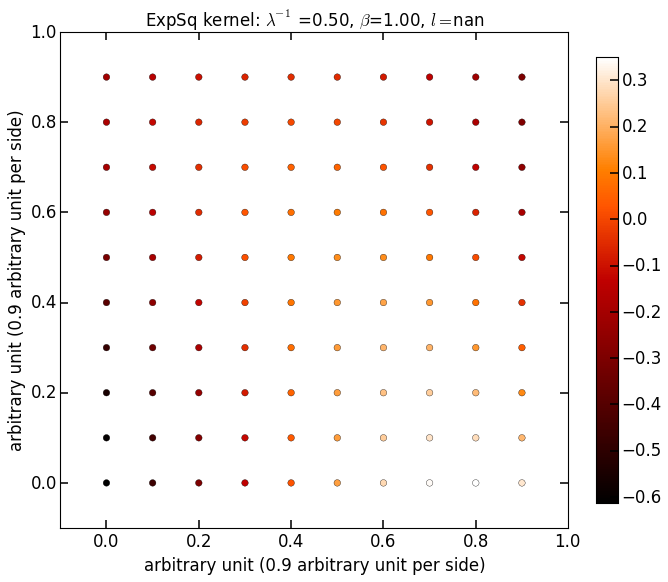

In [23]:
plot.plot_2D_gp_samples(psi, coords, 8, rng[1], truth=truth)

In [33]:
sampler, p0 = fit.fit_gp(np.log((0.5, 1.)), data)

Initial guesses were [ 0.49999985  1.        ]
Initial guesses were [ 0.49999983  1.        ]
Initial guesses were [ 0.4999996  1.       ]
Initial guesses were [ 0.50000012  1.        ]
Initial guesses were [ 0.50000003  1.        ]
Initial guesses were [ 0.49999951  1.        ]
Initial guesses were [ 0.49999963  1.        ]
Initial guesses were [ 0.4999998  1.       ]
Running burn-in with length 1000
Running second burn-in with length 1000
Running production chain with length 5000
the optimized p0 values are 
[[ 0.89338317 -0.44210691]
 [ 1.12939121 -0.40078463]
 [ 1.15736832 -0.40373108]
 [ 1.26486423 -0.33275554]
 [ 1.35297107 -0.43869199]
 [ 0.97499389 -0.43470519]
 [ 1.40974764 -0.32311519]
 [ 1.61661595 -0.33977692]]


In [39]:
np.log((0.5, 1))

array([-0.69314718,  0.        ])

* no burn in
* acceptance rate is too high ... 


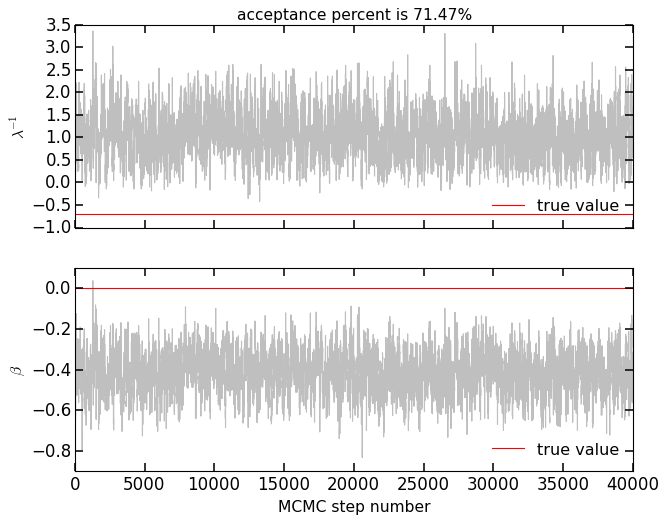

In [37]:
plot.trace_plot(sampler, labels=[r"$\lambda^{-1}$", r"$\beta$"],
                truth=np.log(truth))